In [6]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('red-wine.csv')

df_train = red_wine.sample(frac=0.7,random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

x_train = df_train.drop('quality',axis=1)
x_valid = df_valid.drop('quality',axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [7]:
print(x_train.shape)

(1119, 11)


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512,activation="relu",input_shape=[11]),
    layers.Dense(512,activation='relu'),
    layers.Dense(152,activation='relu'),
    layers.Dense(1),
])

model.compile(optimizer='adam',
              loss='mae',
              )

c:\Users\Raktim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(
    x_train,y_train,
    validation_data=(x_valid,y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2812 - val_loss: 0.1488
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1377 - val_loss: 0.1411
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1261 - val_loss: 0.1242
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1196 - val_loss: 0.1208
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1122 - val_loss: 0.1066
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1090 - val_loss: 0.1069
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1063 - val_loss: 0.1023
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1044 - val_loss: 0.1015
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1027 - val_loss: 0.1060
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1018 - val_loss: 0.1008


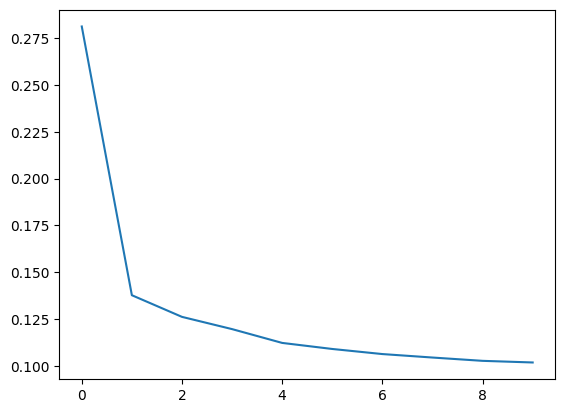

In [10]:
import pandas as pd
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();